<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/timaslj_lab6/timaslj_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab 6: Differential equations**
**Timas Ljungdahl**

# **Abstract**

In this report, 3 types of quadrature algorithms were implemented for approximation of definite integrals. The quadrature rules that were implemented were 2 point Gaussian quadrature, 3 point edge midpoint quadrature and Monte Carlo quadrature. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import unittest
import random
import math

from sympy import * 

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

We want to approximate definite integrals by summing over points in the domain and multiplying by a weight in the following way:

$$
\int_{a}^{b} f(x) dx = \sum_{i = 0}^{n}{f(x_i)w_i}
$$

Gaussian quadrature is constructed to yield an exact result for polynomial integrands of order q with quadrature points $\{x_i\}$ and weights $\{w_i\}$. The most common domain for integration is $[-1, 1]$. For this domain, the two points chosen for two point Gaussian quadrature are $x_0 = 1/\sqrt{3}$ and $x_1 = 1/\sqrt{3}$ with weights $w_0 = w_1 = 1$. To approximate the integral for a general domain $[a,b]$ we have to map the domain to $[-1, 1]$ in order for the rules to apply. This was done following the following formula: 

$$
\int_{a}^{b} f(x) dx = \int_{-1}^{1}f(\dfrac{b-a}{2}\hat{x}+ \dfrac{a+b}{2})\dfrac{dx}{d\hat{x}}d\hat{x} \approx \dfrac{b-a}{2} \sum_{i=1}^{n}w_if(\dfrac{b-a}{2}\hat{x}_i + \dfrac{a+b}{2})
$$

where $\{\hat{x}_i\}$ are the quadrature points in the domain $[-1, 1]$. The 2 point Gauss rule is exact for $p \in p^3([-1,1])$. 

For the 3-point edge midpoint quadrature over the unit triangle, the points $x_0 = (0.5,0)$, $x_1 = (0.5,0.5)$, $x_2 = (0,0.5)$ and weights $w_0 = w_1 = w_2 = 1/6$ yield an exact result for $p \in p^2$

Monte Carlo quadrature follows the following formula:

$$
    \int_{D} g(x) dx \approx \dfrac{|D|}{n}\sum_{i=1}^{n}g(x_i)
$$
where $D$ the integration domain and $\{x_i\}$ are randomly chosen quadrature points. This technique evolves around creating "boxes" on the whole domain and taking the size average of these boxes. The error of this technique converges at the rate $\dfrac{1}{\sqrt{n}}$. 



# **Methods**

The algorithms were implemented following the lecture notes. To test the various algorithms, random polynomials were generated and tested against the sympy integration.

# **Results**

### **Time stepping for scalar initial value problem du/dt = f(u,t)**

The algorithm is tested many times for different intervals and random cubic polynomials. Since two point Gaussian quadrature should yield an exact result for cubic polynomials, the result is asserted to be equal to the result from sympy integration. 

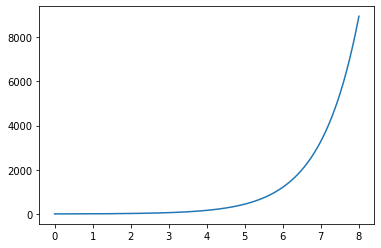

8942.838189725211


In [15]:
def explicit_euler_scalar(T, f, initVal):
    time_steps = np.arange(0, T+1e-6, 1e-6)
    U = np.zeros(len(time_steps))
    U[0] = initVal
    for i in range(1, len(time_steps-1)):
        dif = time_steps[i] - time_steps[i-1]
        #print(dif)
        U[i] = U[i-1] + dif*f(U[i-1], time_steps[i-1])
    
    plt.plot(time_steps, U)
    plt.show()

    return U

U = explicit_euler(8, lambda u,t: u ,3)

### **Time stepping for a system of  initial value problems du/dt = f(u,t)**
The algorithm is tested many times for random quadratic polynomials. Since 3 point quadrature should yield an exact result for quadratic polynomials, the result is asserted to be equal to the result from sympy integration. 

In [45]:
def explicit_euler_system(T, f, initVector):
    time_steps = np.arange(0, T+1e-6, 1e-6)
    U = np.zeros((2, len(time_steps)))
    U[:,0] = initVector
    for i in range(1, len(time_steps-1)):
        dif = time_steps[i] - time_steps[i-1]
        U[:,i] = U[:,i-1] + dif*f(U[:,i-1], time_steps[i-1])
    
    return U

#u is a vector of functions of t
explicit_euler_system(8, lambda u, t: np.array([0.85*u[0], u[1]]),[19, 1])
#print(U[1_000_000 * 8])


array([[ 19.        ,  19.00001615,  19.0000323 , ..., 104.0048369 ,
        104.0049253 , 104.0050137 ],
       [  1.        ,   1.000001  ,   1.000002  , ...,   7.38904132,
          7.38904871,   7.3890561 ]])

# **Discussion**

The tests generated expected results. The Gauss quadrature and mid-point rules were exact for all the randomly generated functions. Instead of using sympy, I could have calculated the integrals analytically and entered the randomly generated coefficients.

The Monto Carlo quadrature error indeed seems to follow the expected convergence of $\dfrac{1}{\sqrt{n}}$ which can be seen in both graphs.